In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
results = pd.read_csv('results.csv')

In [3]:
index = np.linspace(0,31,32).astype(int)

In [4]:
participant = ['PB', 'PB', 'PB', 'PB', 'PA', 'PA', 'PA', 'PA','PB', 'PB', 'PB', 'PB', 'PA', 'PA', 'PA', 'PA','PB', 'PB', 'PB', 'PB', 'PA', 'PA', 'PA', 'PA','PB', 'PB', 'PB', 'PB', 'PA', 'PA', 'PA', 'PA']

In [5]:
group = ['Group 4','Group 4','Group 4','Group 4','Group 4','Group 4','Group 4','Group 4', 'Group 3', 'Group 3', 'Group 3', 'Group 3', 'Group 3', 'Group 3', 'Group 3', 'Group 3','Group 2','Group 2','Group 2','Group 2','Group 2','Group 2','Group 2','Group 2','Group 1','Group 1','Group 1','Group 1','Group 1','Group 1','Group 1','Group 1']

In [6]:
session = ['Session 2', 'Session 2', 'Session 1', 'Session 1','Session 2', 'Session 2', 'Session 1', 'Session 1','Session 2', 'Session 2', 'Session 1', 'Session 1','Session 2', 'Session 2', 'Session 1', 'Session 1','Session 2', 'Session 2', 'Session 1', 'Session 1','Session 2', 'Session 2', 'Session 1', 'Session 1','Session 2', 'Session 2', 'Session 1', 'Session 1','Session 2', 'Session 2', 'Session 1', 'Session 1']

In [7]:
trial = ['Trial 2', 'Trial 1','Trial 2', 'Trial 1','Trial 2', 'Trial 1','Trial 2', 'Trial 1','Trial 2', 'Trial 1','Trial 2', 'Trial 1','Trial 2', 'Trial 1','Trial 2', 'Trial 1','Trial 2', 'Trial 1','Trial 2', 'Trial 1','Trial 2', 'Trial 1','Trial 2', 'Trial 1','Trial 2', 'Trial 1','Trial 2', 'Trial 1','Trial 2', 'Trial 1','Trial 2', 'Trial 1']

In [8]:
data_description = pd.DataFrame({
    'Index':index,
    'Participant':participant,
    'Group':group,
    'Session':session,
    'Trial':trial
})

In [9]:
final_results = pd.concat([data_description, results], axis=1)

In [10]:
final_results.head()

,Index,Participant,Group,Session,Trial,Mean Left Ankle Dorsiflexion in Stance,Peak Left Knee Flexion in Swing,Mean Left Hip Rotation
0,0,PB,Group 4,Session 2,Trial 2,17.287737,71.3704,-19.346305
1,1,PB,Group 4,Session 2,Trial 1,16.751825,71.2221,-17.559918
2,2,PB,Group 4,Session 1,Trial 2,11.838906,55.3924,3.498239
3,3,PB,Group 4,Session 1,Trial 1,12.504568,55.9147,3.645807
4,4,PA,Group 4,Session 2,Trial 2,-0.342489,46.0284,28.371782


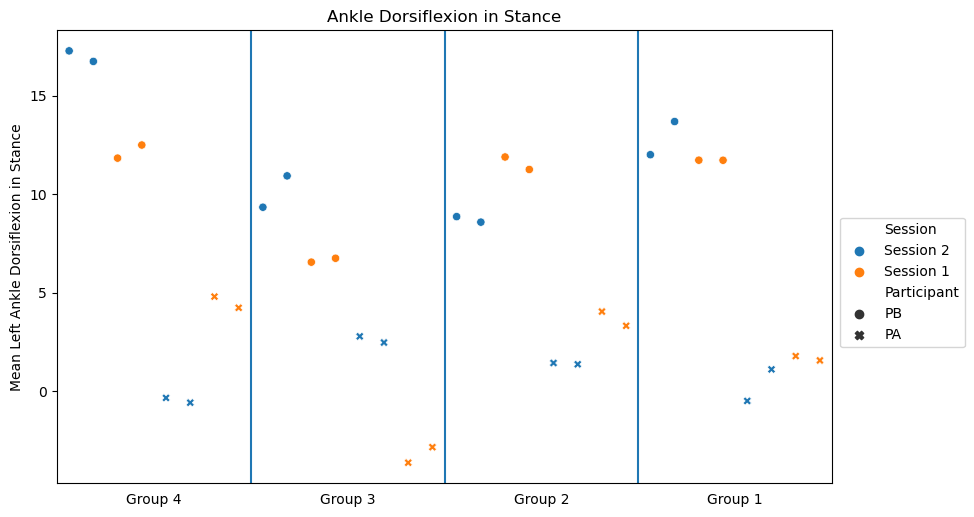

In [11]:
plt.figure(figsize=(10,6), dpi=100)
sns.scatterplot(data=final_results, x='Index', y='Mean Left Ankle Dorsiflexion in Stance', hue='Session', style='Participant')
plt.axvline(x=7.5)
plt.axvline(x=15.5)
plt.axvline(x=23.5)
plt.xticks([3.5,11.5,19.5,27.5],['Group 4','Group 3','Group 2','Group 1'])
plt.tick_params(bottom=False)
plt.xlabel('')
plt.xlim([-0.5,31.5])
plt.legend(loc=(1.01,0.3))
plt.title('Ankle Dorsiflexion in Stance')
plt.show()

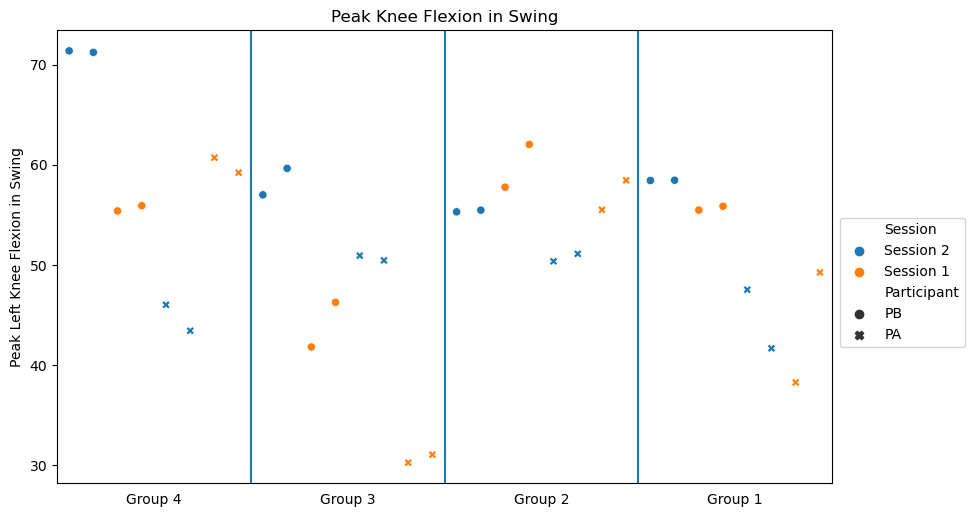

In [12]:
plt.figure(figsize=(10,6), dpi=100)
sns.scatterplot(data=final_results, x='Index', y='Peak Left Knee Flexion in Swing', hue='Session', style='Participant')
plt.axvline(x=7.5)
plt.axvline(x=15.5)
plt.axvline(x=23.5)
plt.xticks([3.5,11.5,19.5,27.5],['Group 4','Group 3','Group 2','Group 1'])
plt.tick_params(bottom=False)
plt.xlabel('')
plt.xlim([-0.5,31.5])
plt.legend(loc=(1.01,0.3))
plt.title('Peak Knee Flexion in Swing')
plt.show()

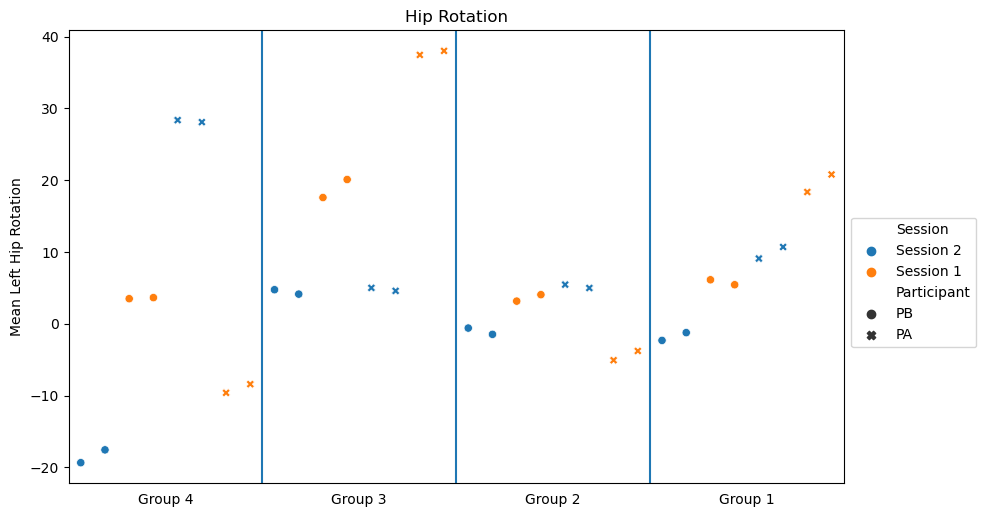

In [13]:
plt.figure(figsize=(10,6), dpi=100)
sns.scatterplot(data=final_results, x='Index', y='Mean Left Hip Rotation', hue='Session', style='Participant')
plt.axvline(x=7.5)
plt.axvline(x=15.5)
plt.axvline(x=23.5)
plt.xticks([3.5,11.5,19.5,27.5],['Group 4','Group 3','Group 2','Group 1'])
plt.tick_params(bottom=False)
plt.xlabel('')
plt.xlim([-0.5,31.5])
plt.legend(loc=(1.01,0.3))
plt.title('Hip Rotation')
plt.show()

### Inter Group Error Variance

In [14]:
inter_group_var_ankle = np.var(final_results['Mean Left Ankle Dorsiflexion in Stance'])
inter_group_var_knee = np.var(final_results['Peak Left Knee Flexion in Swing'])
inter_group_var_hip = np.var(final_results['Mean Left Hip Rotation'])
print(f'Variance of mean left ankle dorsiflexion during stance between all the trials (all groups): {round(inter_group_var_ankle, 2)}')
print(f'Variance of peak left knee flexion during swing between all the trials (all groups): {round(inter_group_var_knee, 2)}')
print(f'Variance of mean left hip rotation between all the trials (all groups): {round(inter_group_var_hip, 2)}')

Variance of mean left ankle dorsiflexion during stance between all the trials (all groups): 32.18
Variance of peak left knee flexion during swing between all the trials (all groups): 86.85
Variance of mean left hip rotation between all the trials (all groups): 182.67


### Inter Group Error Range

In [15]:
results_analysis = final_results
results_analysis = results_analysis.drop(['Group', 'Index', 'Session', 'Trial'], axis=1)

rrange = results_analysis.groupby('Participant').max()-results_analysis.groupby('Participant').min()
rrange

,Mean Left Ankle Dorsiflexion in Stance,Peak Left Knee Flexion in Swing,Mean Left Hip Rotation
Participant,,,
PA,8.437352,30.4434,47.630618
PB,10.733757,29.5569,39.443521


### Intra Group Error Range/ Inter Session Error

In [16]:
results_analysis = final_results
results_analysis = results_analysis.drop(['Index', 'Session', 'Trial'], axis=1)

rmax = results_analysis.groupby(['Participant','Group']).max()
rmin = results_analysis.groupby(['Participant','Group']).min()

rrange = rmax-rmin
rrange

Mean Left Ankle Dorsiflexion in Stance  \
Participant Group                                             
PA          Group 1                                2.278915   
            Group 2                                2.678077   
            Group 3                                6.418588   
            Group 4                                5.388315   
PB          Group 1                                1.966733   
            Group 2                                3.309952   
            Group 3                                4.383116   
            Group 4                                5.448832   

                     Peak Left Knee Flexion in Swing  Mean Left Hip Rotation  
Participant Group                                                             
PA          Group 1                          10.9772               11.710138  
            Group 2                           8.0791               10.529078  
            Group 3                          20.6666               33.432622  
            Group 4                          17.2740               37.986411  
PB          Group 1                           2.9800                8.446166  
            Group 2                           6.7259                5.529208  
            Group 3                          17.8303               15.963342  
            Group 4                          15.9780               22.992113

### Intra Session Errror

In [17]:
results_analysis = final_results
results_analysis = results_analysis.drop(['Index', 'Trial'], axis=1)

rmax = results_analysis.groupby(['Participant','Group', 'Session']).max()
rmin = results_analysis.groupby(['Participant','Group', 'Session']).min()

rrange = rmax-rmin
rrange

Mean Left Ankle Dorsiflexion in Stance  \
Participant Group   Session                                             
PA          Group 1 Session 1                                0.222055   
                    Session 2                                1.603396   
            Group 2 Session 1                                0.722721   
                    Session 2                                0.065358   
            Group 3 Session 1                                0.789485   
                    Session 2                                0.314317   
            Group 4 Session 1                                0.567871   
                    Session 2                                0.243449   
PB          Group 1 Session 1                                0.003723   
                    Session 2                                1.684502   
            Group 2 Session 1                                0.634924   
                    Session 2                                0.280636   
            Group 3 Session 1                                0.197707   
                    Session 2                                1.593053   
            Group 4 Session 1                                0.665662   
                    Session 2                                0.535912   

                               Peak Left Knee Flexion in Swing  \
Participant Group   Session                                      
PA          Group 1 Session 1                          10.9772   
                    Session 2                           5.8514   
            Group 2 Session 1                           2.9378   
                    Session 2                           0.7427   
            Group 3 Session 1                           0.8011   
                    Session 2                           0.4776   
            Group 4 Session 1                           1.4965   
                    Session 2                           2.5930   
PB          Group 1 Session 1                           0.3820   
                    Session 2                           0.0239   
            Group 2 Session 1                           4.2665   
                    Session 2                           0.1690   
            Group 3 Session 1                           4.4641   
                    Session 2                           2.6424   
            Group 4 Session 1                           0.5223   
                    Session 2                           0.1483   

                               Mean Left Hip Rotation  
Participant Group   Session                            
PA          Group 1 Session 1                2.442603  
                    Session 2                1.609482  
            Group 2 Session 1                1.284872  
                    Session 2                0.474221  
            Group 3 Session 1                0.563123  
                    Session 2                0.418219  
            Group 4 Session 1                1.207295  
                    Session 2                0.281599  
PB          Group 1 Session 1                0.690036  
                    Session 2                1.084795  
            Group 2 Session 1                0.899800  
                    Session 2                0.876012  
            Group 3 Session 1                2.510329  
                    Session 2                0.613544  
            Group 4 Session 1                0.147568  
                    Session 2                1.786387

In [21]:
disp_results = final_results.drop(['Index'], axis=1)
disp_results

,Participant,Group,Session,Trial,Mean Left Ankle Dorsiflexion in Stance,Peak Left Knee Flexion in Swing,Mean Left Hip Rotation
0,PB,Group 4,Session 2,Trial 2,17.287737,71.3704,-19.346305
1,PB,Group 4,Session 2,Trial 1,16.751825,71.2221,-17.559918
2,PB,Group 4,Session 1,Trial 2,11.838906,55.3924,3.498239
3,PB,Group 4,Session 1,Trial 1,12.504568,55.9147,3.645807
4,PA,Group 4,Session 2,Trial 2,-0.342489,46.0284,28.371782
5,PA,Group 4,Session 2,Trial 1,-0.585938,43.4354,28.090183
6,PA,Group 4,Session 1,Trial 2,4.802377,60.7094,-9.614629
7,PA,Group 4,Session 1,Trial 1,4.234506,59.2129,-8.407334
8,PB,Group 3,Session 2,Trial 2,9.344043,57.0014,4.747418
9,PB,Group 3,Session 2,Trial 1,10.937096,59.6438,4.133874
